Before you turn this problem in, make sure everything runs as expected. First, **restart the kernel** (in the menubar, select Kernel$\rightarrow$Restart) and then **run all cells** (in the menubar, select Cell$\rightarrow$Run All).

Make sure you fill in any place that says `YOUR CODE HERE` or "YOUR ANSWER HERE", as well as your name and collaborators below:

In [1]:
NAME = "Aiman Lameesa"
ID = "st122876"

---

# Machine Learning Lab 04: Multinomial Logistic Regression


## Generalized Linear Models

From lecture, we know that members of the exponential family distributions can be written in the form
$$p(y;\eta) = b(y)e^{(\eta^\top T(y)-a(\eta))},$$
where
- $\eta$ is the natural parameter or canonical paramter of the distribution,
- $T(y)$ is the sufficient statistic (we normally use $T(y) = y$),
- $b(y)$ is an arbitrary scalar function of y, and
- $a(\eta)$ is the log partition function. We use $e^{a(\eta)}$ just to normalize the distribution to have a sum or integral of 1.

Each choice of $T$, $a$, and $b$ defines a family (set) of distributions parameterized by $\eta$.

If we can write $p(y \mid \mathbf{x} ; \theta)$ as a member of the exponential family of distributions with parameters $\mathbf{\eta}$ with
$\eta_i = \theta^\top_i \mathbf{x}$, we obtain a *generalized linear model* that can be optimized using the maximum likelihood principle.

The GLM for the Gaussian distribution with natural parameter $\eta$ being the mean of the Gaussian gives us ordinary linear regression.

The Bernoulli distribution with parameter $\phi$ can be written as an exponential distribution
with natural parmeter $\eta = \log \frac{\phi}{1-\phi}$. The GLM for this distribution is logistic regression.

When we write the multinomial distribution with paremeters $\phi_i > 0$ for classes $i \in 1..K$ with the constraint that
$$\sum_{i=1}^{K} \phi_i = 1$$ as a member of the exponential family,
the resulting GLM is called *multinomial logistic regression*. The parameters $\phi_1, \ldots, \phi_K$ are written
in terms of $\theta$ as
$$\phi_i = p(y = i \mid \mathbf{x}; \theta) = \frac{e^{\theta^\top_i \mathbf{x}}}{\sum_{j=1}^{K}e^{\theta^\top_j \mathbf{x}}}. $$

## Optimizing a Multinomial Regression Model

In multinomial regression, we have

1. Data are pairs $\mathbf{x}^{(i)}, y^{(i)}$ with $\mathbf{x}^{(i)} \in \mathbb{R}^n$ and
   $y \in 1..K$.
   
2. The hypothesis is a vector-valued function
$$\mathbf{h}_\theta(\mathbf{x}) = \begin{bmatrix} p(y = 1 \mid \mathbf{x} ; \theta) \\
                                         p(y = 2 \mid \mathbf{x} ; \theta) \\
                                         \vdots \\
                                         p(y = K \mid \mathbf{x} ; \theta) \end{bmatrix},$$
    where $$p(y = i \mid \mathbf{x}) = \phi_i = p(y = i \mid \mathbf{x}; \theta) = \frac{e^{\theta^\top_i \mathbf{x}}}{\sum_{j=1}^{K}e^{\theta^\top_j \mathbf{x}}}. $$

We need a cost function and a way to minimize that cost function. As usual, we try to find the parameters maximizing the likelihood or log likelihood function, or equivalently, minimizing the negative log likelihood function:

$$\theta^* = \text{argmax}_\theta {\cal L}(\theta) =
             \text{argmax}_\theta \ell(\theta) =
             \text{argmin}_\theta J(\theta),$$
where
$$\begin{eqnarray}
   J(\theta) & = & - \ell(\theta) \\
   & = & - \sum_{i=1}^m \log p(y^{(i)} \mid \textbf{x}^{(i)} ; \theta).
   \end{eqnarray}$$

Now that we know what is $J(\theta)$, let's try to find its minimimum by taking the derivatives with respect to an arbitrary parameter $\theta_{kl}$, the $l$-th element of the parameter vector $\theta_k$ for class $k$. Before we start, let's define a variable $a_k$ as the linear activation for class $k$ in the softmax function:
$$ a_k = \theta_k^\top \mathbf{x}^{(i)}, $$
and rewrite the softmax more conveniently as
$$ \phi_k = \frac{e^{a_k}}{\sum_{j=1}^K e^{a_j}}. $$
That makes it a little easier to compute the gradient:
$$\begin{eqnarray}
   \frac{\partial J}{\partial \theta_{kl}} & = & - \sum_{i=1}^m \frac{1}{\phi_{y^{(i)}}} \frac{\partial \phi_{y^{(i)}}}{\partial \theta_{kl}}. \\
   \end{eqnarray}$$
Using the chain rule, we have
$$\frac{\partial \phi_{y^{(i)}}}{\partial \theta_{kl}} = \sum_{j=1}^K \frac{\partial \phi_{y^{(i)}}}{\partial a_j} \frac{\partial a_j}{\partial \theta_{kl}}$$
The second factor is easy:
$$ \frac{\partial a_j}{\partial \theta_{kl}} = \delta(k=j)x^{(i)}_l. $$
For the first factor, we have
$$\begin{eqnarray}
\frac{\partial \phi_{y^{(i)}}}{\partial a_j}
& = & \frac{ \left[ \delta(y^{(i)}=j)e^{a_j} \sum_{c=1}^K e^{a_c} \right] - e^{a_j} e^{a_j} }{\left[ \sum_{c=1}^K e^{a_c} \right]^2} \\
& = & \delta(y^{(i)}=j) \phi_j - \phi_j^2
\end{eqnarray}$$

Substituting what we've derived into the definition above, we obtain
$$ \frac{\partial J}{\theta_{kl}} = - \sum_{i=1}^m \sum_{j=1}^K (\delta(y^{(i)}=j) - \phi_j) \frac{\partial a_j}{\partial \theta_{kl}}. $$

There are two ways to do the calculation.
In deep neural networks with multinomial outputs, we want to first calculate the $\frac{\partial J}{\partial a_j}$ terms then use them to calculate $\frac{\partial J}{\partial \theta_{kl}}$.

However, if we only have the "single layer" model described up till now, we note
that
$$\frac{\partial a_j}{\partial \theta_{kl}} = \delta(j=k) x^{(i)}_l,$$
so we can simplify as follows:
$$\begin{eqnarray}
  \frac{\partial J}{\theta_{kl}} & = & - \sum_{i=1}^m \sum_{j=1}^K (\delta(y^{(i)}=j) - \phi_j) \frac{\partial a_j}{\partial \theta_{kl}} \\
  & = & - \sum_{i=1}^m \sum_{j=1}^K (\delta(y^{(i)}=j) - \phi_j) \delta(j=k) x^{(i)}_l \\
  & = & - \sum_{i=1}^m (\delta(y^{(i)}=k) - \phi_k) x^{(i)}_l \\
  \end{eqnarray}$$

## Put It Together

OK! Now we have all 4 criteria for our multinomial regression model:

1. Data are pairs $\mathbf{x}^{(i)}, y^{(i)}$ with $\mathbf{x}^{(i)} \in \mathbb{R}^n$ and
   $y \in 1..K$.
   
2. The hypothesis is a vector-valued function
$$\mathbf{h}_\theta(\mathbf{x}) = \begin{bmatrix} p(y = 1 \mid \mathbf{x} ; \theta) \\
                                         p(y = 2 \mid \mathbf{x} ; \theta) \\
                                         \vdots \\
                                         p(y = K \mid \mathbf{x} ; \theta) \end{bmatrix},$$
    where $$p(y = i \mid \mathbf{x}) = \phi_i = p(y = i \mid \mathbf{x}; \theta) = \frac{e^{\theta^\top_i \mathbf{x}}}{\sum_{j=1}^{K}e^{\theta^\top_j \mathbf{x}}}. $$
    
3. The cost function is
   $$J(\theta) = - \sum_{i=1}^m \log p(y^{(i)} \mid \textbf{x}^{(i)})$$
   
4. The optimization algorithm is gradient descent on $J(\theta)$ with the update rule
   $$\theta_{kl}^{(n+1)} \leftarrow \theta_{kl}^{(n)} - \alpha \sum_{i=1}^m (\delta(y^{(i)}=k) - \phi_k) x^{(i)}_l.$$


## Multinomial Regression Example

The following example of multinomial logistic regression is from [Kaggle](https://www.kaggle.com/saksham219/softmax-regression-for-iris-classification).

The data set is the famous [Iris dataset from the UCI machine learning repository](https://archive.ics.uci.edu/ml/datasets/iris).

The data contain 50 samples from each of three classes. Each class refers to a particular species of the iris plant. 
The data include four independent variables:
1. Sepal length in cm
2. Sepal width in cm
3. Petal length in cm
4. Petal width in cm

The target takes on one of three classes:
1. Iris Setosa
2. Iris Versicolour
3. Iris Virginica
   
To predict the target value, we use multinomial logistic regression for $k=3$ classes i.e. $y \in \{ 1, 2, 3 \}$. 

Given $\mathbf{x}$, we would like to predict a probability distribution over the
three outcomes for $y$, i.e., $\phi_1 = p(y=1 \mid \mathbf{x})$, $\phi_2 = p(y=2 \mid \mathbf{x})$, and $\phi_3 = p(y=3 \mid \mathbf{x})$.


In [1]:
# importing libraries
import numpy as np
import pandas as pd 
import random
import math

The `phi` function returns $\phi_i$ for input patterns $\mathtt{X}$ and parameters $\theta$.

In [2]:
def phi(i, theta, X, num_class):
    """
    Here is how to make documentation for your function show up in intellisense.
    Explanation you put here will be shown when you use it.
    
    To get intellisense in your Jupyter notebook:
        - Press 'TAB' after typing a dot (.) to see methods and attributes
        - Press 'Shift+TAB' after typing a function name to see its documentation

    The `phi` function returns phi_i = h_theta(x) for input patterns X and parameters theta.
    
    Inputs:
        i=index of phi
        
        X=input dataset
        
        theta=parameters

    Returns:
        phi_i
    """
    mat_theta = np.matrix(theta[i])
    mat_x = np.matrix(X)
    num = math.exp(np.dot(mat_theta, mat_x.T))
    den = 0
    for j in range(0,num_class):
        mat_theta_j = np.matrix(theta[j])
        den = den + math.exp(np.dot(mat_theta_j, mat_x.T))
    phi_i = num / den
    return phi_i

**Tips for using intellisense: Shift+TAB**

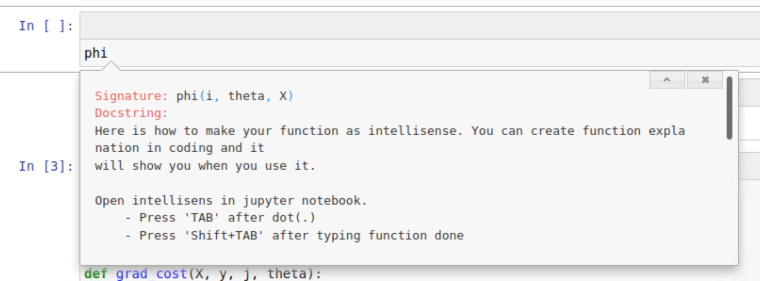

The `grad_cost` function gives the gradient of the cost for data $\mathtt{X}, \mathbf{y}$ for class $j\in 1..k$.

In [3]:
def indicator(i, j):
    '''
    Check whether i is equal to j
    
    Return:
        1 when i=j, otherwise 0
    '''
    if i == j: return 1
    else: return 0


def grad_cost(X, y, j, theta, num_class):
    '''
    Compute the gradient of the cost function for data X, y for parameters of
    output for class j in 1..k
    '''
    m, n = X.shape
    sum = np.array([0 for i in range(0,n)])
    for i in range(0, m):
        p = indicator(y[i], j) - phi(j, theta, X.loc[i], num_class)
        sum = sum + (X.loc[i] * p)
    grad = -sum / m
    return grad

def gradient_descent(X, y, theta, alpha, iters, num_class):
    '''
    Perform iters iterations of gradient descent: theta_new = theta_old - alpha * cost
    '''
    n = X.shape[1]
    for iter in range(iters):
        dtheta = np.zeros((num_class, n))
        for j in range(0, num_class):
            dtheta[j,:] = grad_cost(X, y, j, theta, num_class)
        theta = theta - alpha * dtheta
    return theta

def h(X, theta, num_class):
    '''
    Hypothesis function: h_theta(X) = theta * X
    '''
    X = np.matrix(X)
    h_matrix = np.empty((num_class,1))
    den = 0
    for j in range(0, num_class):
        den = den + math.exp(np.dot(theta[j], X.T))
    for i in range(0,num_class):
        h_matrix[i] = math.exp(np.dot(theta[i], X.T))
    h_matrix = h_matrix / den
    return h_matrix

## Exercise 1.1 (5 points)

Create a function to load **data** from **Iris.csv** using the Pandas library and extract y from the data.

You can use [the Pandas 10 minute guide](https://pandas.pydata.org/pandas-docs/stable/user_guide/10min.html) to learn how to use pandas.

In [4]:
def load_data(file_name, drop_label, y_label, is_print=False):
    # 1. Load csv file
    data = pd.read_csv(file_name)
    if is_print:
        print(data.head())
    # 2. remove 'Id' column from data
    if drop_label is not None:
        data = data.drop([drop_label],axis=1)
        if is_print:
            print(data.head())
    # 3. Extract y_label column as y from data
    # y = None
    y = data[y_label]
    # 4. get index of y-column
    y_index = data.columns.get_loc(y_label)
    # 5. Extrack X features from data
    # X = None
    # YOUR CODE HERE
    X = data.drop([y_label], axis=1)
    # raise NotImplementedError()
    return X, y

In [5]:
X, y = load_data('Iris.csv', 'Id', 'Species', True)
print(X.head())
print(y[:5])

# Test function: Do not remove
# tips: this is how to create dataset using pandas
d_ex = {'ID':     [  1,   2,   3,    4,    5,    6,    7],
        'Grade':  [3.5, 2.5, 3.0, 3.75, 2.83, 3.95, 2.68],
        'Type':   ['A', 'B', 'C',  'A',  'C',  'A',  'B']
        }
df = pd.DataFrame (d_ex, columns = ['ID','Grade', 'Type'])
df.to_csv('out.csv', index=False)

Xtest, ytest = load_data('out.csv', 'ID', 'Type')
assert len(Xtest.columns) == 1, 'number of X_columns incorrect (1)'
assert ytest.name == 'Type', 'Extract y_column is incorrect (1)'
assert ytest.shape == (7,), 'number of y is incorrect (1)'
assert 'Grade' in Xtest.columns, 'Incorrect columns in X (1)'
Xtest, ytest = load_data('out.csv', None, 'Type')
assert len(Xtest.columns) == 2, 'number of X_columns incorrect (2)'
assert ytest.name == 'Type', 'Extract y_column is incorrect (2)'
assert ytest.shape == (7,), 'number of y is incorrect (2)'
assert 'Grade' in Xtest.columns and 'ID' in Xtest.columns, 'Incorrect columns in X (2)'
import os
os.remove('out.csv')

assert len(X.columns) == 4, 'number of X_columns incorrect (3)'
assert 'SepalWidthCm' in X.columns and 'Id' not in X.columns and 'Species' not in X.columns, 'Incorrect columns in X (3)'
assert y.name == 'Species', 'Extract y_column is incorrect (3)'
assert y.shape == (150,), 'number of y is incorrect (3)'

print("success!")
# End Test function

   Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm      Species
0   1            5.1           3.5            1.4           0.2  Iris-setosa
1   2            4.9           3.0            1.4           0.2  Iris-setosa
2   3            4.7           3.2            1.3           0.2  Iris-setosa
3   4            4.6           3.1            1.5           0.2  Iris-setosa
4   5            5.0           3.6            1.4           0.2  Iris-setosa
   SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm      Species
0            5.1           3.5            1.4           0.2  Iris-setosa
1            4.9           3.0            1.4           0.2  Iris-setosa
2            4.7           3.2            1.3           0.2  Iris-setosa
3            4.6           3.1            1.5           0.2  Iris-setosa
4            5.0           3.6            1.4           0.2  Iris-setosa
   SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm
0            5.1           3.5          

**Expected result**: \
   SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm \
0            5.1           3.5            1.4           0.2\
1            4.9           3.0            1.4           0.2\
2            4.7           3.2            1.3           0.2\
3            4.6           3.1            1.5           0.2\
4            5.0           3.6            1.4           0.2\
0    Iris-setosa\
1    Iris-setosa\
2    Iris-setosa\
3    Iris-setosa\
4    Iris-setosa\
Name: Species, dtype: object

## Exercise 1.2 (10 points)

Partition data into training and test sets
- No need to use random.seed function!
- Ensure that the train set is 70% and the test set is 30% of the data.
- Encode the labels in the y attribute to be integers in the range 0..k-1.

<details>
    <summary><font size="3" color="green"><b>Hint:</b></font></summary>
    You can use the <tt>partition</tt> function from lab02 if you like
    <p></p>
    <a href="https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.iloc.html">panda.iloc</a> must be used to extract data from an index list
    <p></p>
    <a href="https://pandas.pydata.org/docs/reference/api/pandas.unique.html">panda.unique</a> will give you the set of unique labels
</details>

In [6]:
def partition(X, y, percent_train):
    # 1. create index list
    # 2. shuffle index
    # 3. Create train/test index
    # 4. Separate X_Train, y_train, X_test, y_test
    # 5. Get y_labels_name from y using pandas.unique function
    # 6. Change y_labels_name into string number and put into y_labels_new
    # 7. Drop shuffle index columns
    #     - pandas.reset_index() and pandas.drop(...) might be help
    
    y_labels_name = None
    y_labels_new = None
    
    # YOUR CODE HERE
    
    idx = np.arange(0,y.shape[0])
    
    random.shuffle(idx)
    
    m = X.shape[0]
    idx_train = idx[0: int(percent_train*len(X))]
    idx_test = idx[int(percent_train*len(X)):]
    
    X_train = X.iloc[idx_train]
    y_train = y.iloc[idx_train]
    X_test = X.iloc[idx_test]
    y_test = y.iloc[idx_test]
    
    y_labels_name = pd.unique(y) 
    
    y_labels_new = []
    
    i = 0
    for label in y_labels_name:
        print(label)
        y_labels_new.append(i)
        i = i + 1
    
    X_train_reset = X_train.reset_index()
    X_train = X_train_reset.drop(['index'], axis = 1)
    
    X_test_reset = X_test.reset_index()
    X_test = X_test_reset.drop(['index'], axis = 1)
    
    y_train_reset = y_train.reset_index()
    y_train = y_train_reset.drop(['index'], axis = 1)
    y_train = pd.Series(y_train.values.reshape(-1,))
        
    y_test_reset = y_test.reset_index()
    y_test = y_test_reset.drop(['index'], axis = 1)
    y_test = pd.Series(y_test.values.reshape(-1,))
    
    for i in y_labels_new:
        y_train = y_train.replace(y_labels_name[i],i)
        y_test = y_test.replace(y_labels_name[i],i)
    # raise NotImplementedError()
    
    return idx, X_train, y_train, X_test, y_test, y_labels_name, y_labels_new

In [7]:
percent_train = 0.7
idx, X_train, y_train, X_test, y_test, y_labels_name, y_labels_new = partition(X, y, percent_train)
print('X_train.shape', X_train.shape)
print('X_test.shape', X_test.shape)
print('y_train.shape', y_train.shape)
print('y_test.shape', y_test.shape)
print('y_labels_name: ', y_labels_name)
print('y_labels_new: ', y_labels_new)
print(X_train.head())
print(y_train.head())

# Test function: Do not remove
assert len(y_labels_name) == 3 and len(y_labels_new) == 3, 'number of y uniques are incorrect'
assert X_train.shape == (105, 4), 'Size of X_train is incorrect'
assert X_test.shape == (45, 4), 'Size of x_test is incorrect'
assert y_train.shape == (105, ), 'Size of y_train is incorrect'
assert y_test.shape == (45, ), 'Size of y_test is incorrect'
assert 'Iris-setosa' in y_labels_name and 'Iris-virginica' in y_labels_name and \
        'Iris-versicolor' in y_labels_name, 'y unique data incorrect'
assert min(y_labels_new) == 0 and max(y_labels_new) < 3, 'label indices are incorrect'

print("success!")
# End Test function

Iris-setosa
Iris-versicolor
Iris-virginica
X_train.shape (105, 4)
X_test.shape (45, 4)
y_train.shape (105,)
y_test.shape (45,)
y_labels_name:  ['Iris-setosa' 'Iris-versicolor' 'Iris-virginica']
y_labels_new:  [0, 1, 2]
   SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm
0            5.5           2.6            4.4           1.2
1            7.0           3.2            4.7           1.4
2            6.3           2.8            5.1           1.5
3            6.5           3.0            5.5           1.8
4            6.9           3.1            5.4           2.1
0    1
1    1
2    2
3    2
4    2
dtype: int64
success!


**Expected result**: <span style="color:blue">(*or similar*)</span>\
X_train.shape (105, 4)\
X_test.shape (45, 4)\
y_train.shape (105,)\
y_test.shape (45,)\
y_labels_name:  ['Iris-setosa' 'Iris-versicolor' 'Iris-virginica'] \
y_labels_new:  [0, 1, 2]

SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm\
0            6.4           2.8            5.6           2.2\
1            6.7           3.3            5.7           2.1\
2            4.6           3.4            1.4           0.3\
3            5.1           3.8            1.5           0.3\
4            5.0           2.3            3.3           1.0\
   Species\
0        2\
1        2\
2        0\
3        0\
4        1

## Exercise 1.3 (5 points)

Train your classification model using the `gradient_descent` function already provided.
You might also play around with the gradient descent function to see if you can speed it up!

In [8]:
# num_class is the number of unique labels
num_class = len(y_labels_name)

if (X_train.shape[1] == X.shape[1]): 
    X_train.insert(0, "intercept", 1)

# Reset m and n for training data
r, c = X_train.shape

# Initialize theta for each class
theta_initial = np.ones((num_class, c))

alpha = .05
iterations = 200

#theta = None
# Logistic regression
# YOUR CODE HERE
theta = gradient_descent(X_train, y_train, theta_initial, alpha, iterations, num_class)
#raise NotImplementedError()

In [9]:
print(theta)
print(theta.shape)

# Test function: Do not remove
assert theta.shape == (3, 5), 'Size of theta is incorrect'

print("success!")
# End Test function

[[ 1.16518751  1.3049946   1.83852455 -0.18070218  0.44889947]
 [ 1.08964331  1.23948153  0.68392248  1.12398308  0.8421779 ]
 [ 0.74516917  0.45552387  0.47755297  2.0567191   1.70892264]]
(3, 5)
success!


**Expected result**: <span style="color:blue">(*or similar*)</span>\
[[ 1.17632192  1.32360047  1.83204165 -0.20224445  0.44039155]\
 [ 1.10140069  1.13537321  0.74833178  1.21907866  0.82567377]\
 [ 0.72227738  0.54102632  0.41962657  1.98316579  1.73393467]]\
\
(3, 5)

## Exercise 1.4 (5 points)

Let's get your model to make predictions on the test data.

In [10]:
# Prediction on test data 

if (X_test.shape[1] == X.shape[1]): 
    X_test.insert(0, "intercept", 1)

# Reset m and n for test data
r,c = X_test.shape

y_pred = []
for index,row in X_test.iterrows(): # get a row of X_test data
    # calculate y_hat using hypothesis function
    # y_hat = None
    # find the index (integer value) of maximum value in y_hat and input back to prediction
    # prediction = None
    # YOUR CODE HERE
    
    y_hat = h(row, theta, num_class)
    prediction = int(np.argmax(y_hat))
    
    # raise NotImplementedError()
    # collect the result
    y_pred.append(prediction)

In [11]:
print(len(y_pred))
print(y_pred[:7])
print(type(y_pred[0]))

# Test function: Do not remove
assert len(y_pred) == 45, 'Size of y_pred is incorrect'
assert isinstance(y_pred[0], int) and isinstance(y_pred[15], int) and isinstance(y_pred[17], int), 'prediction type is incorrect'
assert max(y_pred) < 3 and min(y_pred) >= 0, 'wrong index of y_pred'

print("success!")
# End Test function

45
[2, 2, 0, 1, 0, 1, 1]
<class 'int'>
success!


**Expected result**: <span style="color:blue">(*or similar*)</span>\
45 \
[2, 0, 2, 0, 0, 0, 2] \
<class 'int'>

## Exercise 1.5 (5 points)

Estimate accuracy of model on test data

$$\text{accuracy} = \frac{\text{number of correct test predictions}}{m_{\text{test}}}$$

In [12]:
def calc_accuracy(y_test, y_pred):
    # accuracy = None
    # YOUR CODE HERE
    correct_pred = np.count_nonzero([y_test == y_pred])
    accuracy = correct_pred/y_test.shape[0]
    # raise NotImplementedError()
    return accuracy

In [13]:
accuracy = calc_accuracy(y_test, y_pred)
print('Accuracy: %.4f' % accuracy)

# Test function: Do not remove
assert isinstance(accuracy, float), 'accuracy should be floating point'
assert accuracy >= 0.8, 'Did you train the data?'

print("success!")
# End Test function

Accuracy: 0.9556
success!


**Expected result**: should be at least 0.8!

## On your own in lab

We will do the following in lab:
1. Write a function to obtain the cost for particular $\mathtt{X}$, $\mathbf{y}$, and $\theta$.
2. Plot the training set and test cost as training goes on and find the best value for the number of iterations and learning rate.
3. Make 2D scatter plots showing the predicted and actual class of each item in the training set, plotting two features at a time.
   Comment on the cause of the errors you observe. If you obtain perfect test set accuracy, re-run the train/test split
   and rerun the optimization until you observe some mistaken predictions on the test set.


## Exercise 2.1 (15 points)

1. Write a function to obtain the cost for particular $\mathtt{X}$, $\mathbf{y}$, and $\theta$.
   Name your function `my_J()` and implement

$$ J_j = -\delta(y, j)\log{\phi_j} $$


In [14]:
def my_J(theta, X, y, j, num_class):
    # cost = None
    # YOUR CODE HERE
    cost = -(indicator(y, j)) * np.log(phi(j, theta, X, num_class))
    #raise NotImplementedError()
    return cost

In [15]:
# Test function: Do not remove
m, n = X_train.shape
test_theta = np.ones((3, n))  
cost = my_J(test_theta, X_train.loc[10], y_train[10], 0, 3)
assert isinstance(cost, float), 'cost should be floating point'

print("success!")
# End Test function

success!


2. Implement <code>my_grad_cost</code> using your <code>my_J</code> function

In [16]:
def my_grad_cost(X, y, j, theta, num_class):
    # grad = None
    # cost = None
    # YOUR CODE HERE
    m, n = X.shape
    sum_ = np.zeros(n)
    total_cost = 0
    
    for i in range(0, m):
        p = indicator(y[i], j) - phi(j, theta, X.loc[i], num_class)
        cost_ = my_J(theta, X.iloc[i], y.iloc[i], j, num_class)
        sum_ = sum_ + (X.loc[i] * p)
        total_cost = total_cost + cost_
    
    grad = -sum_ / m
    cost = total_cost
    # raise NotImplementedError()
    return grad, cost

In [17]:
# Test function: Do not remove
m, n = X_train.shape
test_theta = np.ones((3, n))  
grad, cost = my_grad_cost(X_train, y_train, 0, test_theta, num_class)
print(grad)
print(cost)
assert isinstance(cost, float), 'cost should be floating point'
assert isinstance(grad['intercept'], float) and \
        isinstance(grad['SepalLengthCm'], float) and \
        isinstance(grad['SepalWidthCm'], float) and \
        isinstance(grad['PetalLengthCm'], float) and \
        isinstance(grad['PetalWidthCm'], float) , 'grad should be floating point'
print("success!")
# End Test function

intercept        0.028571
SepalLengthCm    0.439683
SepalWidthCm    -0.038730
PetalLengthCm    0.841270
PetalWidthCm     0.338730
dtype: float64
35.15559323737952
success!


**Expect result**: <span style="color:blue">(*or similar*)</span>\
intercept        0.009524\
SepalLengthCm    0.316825\
SepalWidthCm    -0.091429\
PetalLengthCm    0.780000\
PetalWidthCm     0.329524\
dtype: float64\
37.352817814715735

3. Implement <code>my_gradient_descent</code> using your <code>my_grad_cost</code> function

In [18]:
def my_gradient_descent(X, y, theta, alpha, iters, num_class):        
    cost_arr = []
    # YOUR CODE HERE
    m, n = X.shape
    
    for i in range(iters):
        total_cost = 0
        dtheta = np.zeros((num_class, n))
        for j in range(0, num_class):
            dtheta[j,:] , cost = my_grad_cost(X, y, j, theta, num_class)
            total_cost = total_cost + cost
        cost_arr.append(total_cost)
        theta = theta - alpha * dtheta
    # raise NotImplementedError()
    return theta, cost_arr

In [19]:
# Test function: Do not remove
m, n = X_train.shape
test_theta = np.ones((3, n))  
theta, cost = my_gradient_descent(X_train, y_train, theta_initial, 0.001, 5, 3)
print(theta)
print(cost)
print("success!")
# End Test function

[[0.99987721 0.99792477 1.00025339 0.99588319 0.99833593]
 [1.0000446  1.00038766 0.99963235 1.00080836 1.0002065 ]
 [1.00007819 1.00168757 1.00011425 1.00330845 1.00145756]]
[115.35429031015153, 115.17343185120691, 114.99760308308002, 114.82658785601416, 114.66017968463046]
success!


**Expected result**: <span style="color:blue">(*or similar*)</span>\
[[1.00001186 0.99618853 1.00183642 0.9889817  0.99528923]\
 [1.00009697 1.0011823  0.99883395 1.00316763 1.00083055]\
 [0.99987915 1.00255606 0.99929351 1.00779768 1.00386218]]\
[114.00099216453735, 113.89036233839263, 113.78163144339288, 113.67472269747496, 113.56956268162737]\
37.352817814715735

## Exercise 2.2 (20 points)

4. Plot the training set and test cost as training goes on and find the best value for the number of iterations and learning rate.
5. Make 2D scatter plots showing the predicted and actual class of each item in the training set, plotting two features at a time.
   Comment on the cause of the errors you observe. If you obtain perfect test set accuracy, re-run the train/test split
   and rerun the optimization until you observe some mistaken predictions on the test set.

In [20]:
import matplotlib.pyplot as plt

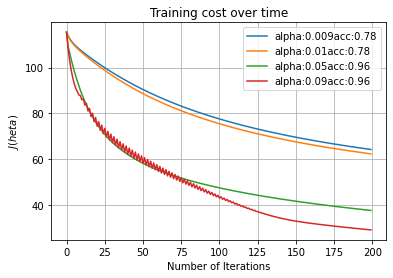

In [22]:
theta_arr = []
cost_arr = []
accuracy_arr = []

# YOUR CODE HERE
# design your own learning rate and num iterations
alpha_arr = np.array([0.009, 0.01, 0.05, 0.09])
iterations_arr = np.array([200, 200, 200, 200])

def prediction(X, theta):
    
    y_pred = []
    
    for index,row in X.iterrows(): # get a row of X_test data
        # calculate y_hat using hypothesis function
        y_hat = h(row, theta, num_class)
        # find the index (integer value) of maximum value in y_hat and input back to prediction
        result = int(np.where(y_hat == np.amax(y_hat))[0])
        prediction = result

        # collect the result
        y_pred.append(prediction)
    return y_pred

for i in range(len(iterations_arr)):
    
    theta, cost = my_gradient_descent(X_train, y_train, theta_initial, alpha_arr[i], iterations_arr[i], num_class)
    theta_arr.append(theta)
    cost_arr.append(cost)
    y_pred = prediction(X_test, theta)
    accuracy = calc_accuracy(y_test, y_pred)
    accuracy_arr.append(accuracy)
    
plt.grid()
plt.plot(cost_arr[0], label='alpha:' + str(alpha_arr[0]) + 'acc:'+ str(round(accuracy_arr[0],2)))
plt.plot(cost_arr[1], label='alpha:' + str(alpha_arr[1]) + 'acc:'+ str(round(accuracy_arr[1],2)))
plt.plot(cost_arr[2], label='alpha:' + str(alpha_arr[2]) + 'acc:'+ str(round(accuracy_arr[2],2)))
plt.plot(cost_arr[3], label='alpha:' + str(alpha_arr[3]) + 'acc:'+ str(round(accuracy_arr[3],2)))
plt.xlabel("Number of Iterations")
plt.ylabel("$J(\theta)$")
plt.title("Training cost over time")
plt.legend()
plt.show()

# raise NotImplementedError()


**Expected result**: <span style="color:blue">(*Yours doesn't have to be the same!*)</span>

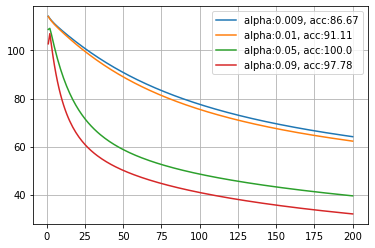

For 200 iterations, the learning rate that could obtain the best performance is 0.09.

In [23]:
y_pred = prediction(X_train, theta)
accuracy = calc_accuracy(y_train, y_pred)
print("Training accuracy:", accuracy)

Training accuracy: 0.9809523809523809


In [24]:
# list of indexes for each actual class
trainX_0 = [i for i in range(len(y_train)) if y_train[i] == 0]
trainX_1 = [i for i in range(len(y_train)) if y_train[i] == 1]
trainX_2 = [i for i in range(len(y_train)) if y_train[i] == 2]

# list of indexes for each predicted class
predX_0 = [i for i in range(len(y_pred)) if y_pred[i] == 0]
predX_1 = [i for i in range(len(y_pred)) if y_pred[i] == 1]
predX_2 = [i for i in range(len(y_pred)) if y_pred[i] == 2]

In [25]:
# retrieving rows from X_train for actaul class index   
Xtrain_0 = X_train.iloc[trainX_0, :]
Xtrain_1 = X_train.iloc[trainX_1, :]
Xtrain_2 = X_train.iloc[trainX_2, :]

# retrieving rows from X_train for predicted class index 
Xpred_0 = X_train.iloc[predX_0, :]
Xpred_1 = X_train.iloc[predX_1, :]
Xpred_2 = X_train.iloc[predX_2, :]

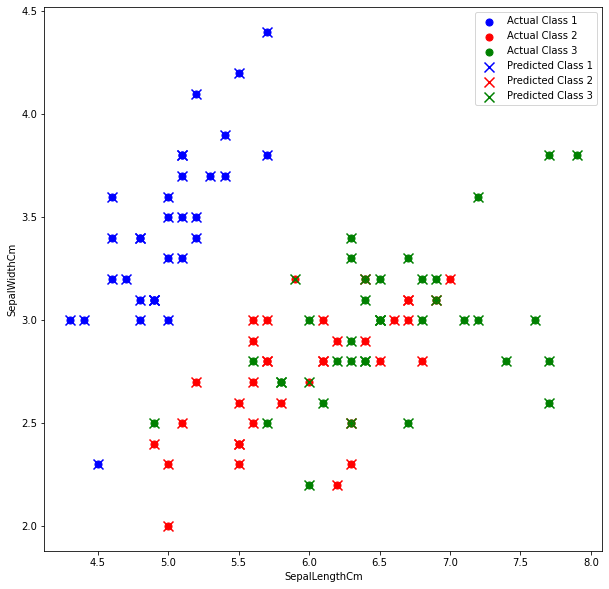

In [26]:
plt.figure(figsize = (10, 10))

plt.xlabel('SepalLengthCm')
plt.ylabel('SepalWidthCm')

plt.scatter(Xtrain_0['SepalLengthCm'], Xtrain_0['SepalWidthCm'], s=50, c='b', marker='o', label='Actual Class 1')
plt.scatter(Xtrain_1['SepalLengthCm'], Xtrain_1['SepalWidthCm'], s=50, c='r', marker='o', label='Actual Class 2')
plt.scatter(Xtrain_2['SepalLengthCm'], Xtrain_2['SepalWidthCm'], s=50, c='g', marker='o', label='Actual Class 3')

plt.scatter(Xpred_0['SepalLengthCm'], Xpred_0['SepalWidthCm'], s=100, c='b', marker='x', label='Predicted Class 1')
plt.scatter(Xpred_1['SepalLengthCm'], Xpred_1['SepalWidthCm'], s=100, c='r', marker='x', label='Predicted Class 2')
plt.scatter(Xpred_2['SepalLengthCm'], Xpred_2['SepalWidthCm'], s=100, c='g', marker='x', label='Predicted Class 3')

plt.legend()
plt.show()

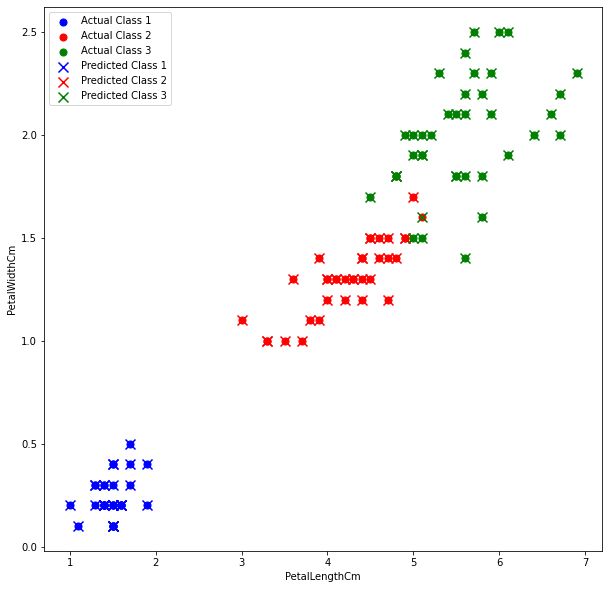

In [27]:
plt.figure(figsize = (10, 10))

plt.xlabel('PetalLengthCm')
plt.ylabel('PetalWidthCm')

plt.scatter(Xtrain_0['PetalLengthCm'], Xtrain_0['PetalWidthCm'], s=50, c='b', marker='o', label='Actual Class 1')
plt.scatter(Xtrain_1['PetalLengthCm'], Xtrain_1['PetalWidthCm'], s=50, c='r', marker='o', label='Actual Class 2')
plt.scatter(Xtrain_2['PetalLengthCm'], Xtrain_2['PetalWidthCm'], s=50, c='g', marker='o', label='Actual Class 3')

plt.scatter(Xpred_0['PetalLengthCm'], Xpred_0['PetalWidthCm'], s=100, c='b', marker='x', label='Predicted Class 1')
plt.scatter(Xpred_1['PetalLengthCm'], Xpred_1['PetalWidthCm'], s=100, c='r', marker='x', label='Predicted Class 2')
plt.scatter(Xpred_2['PetalLengthCm'], Xpred_2['PetalWidthCm'], s=100, c='g', marker='x', label='Predicted Class 3')

plt.legend()
plt.show()

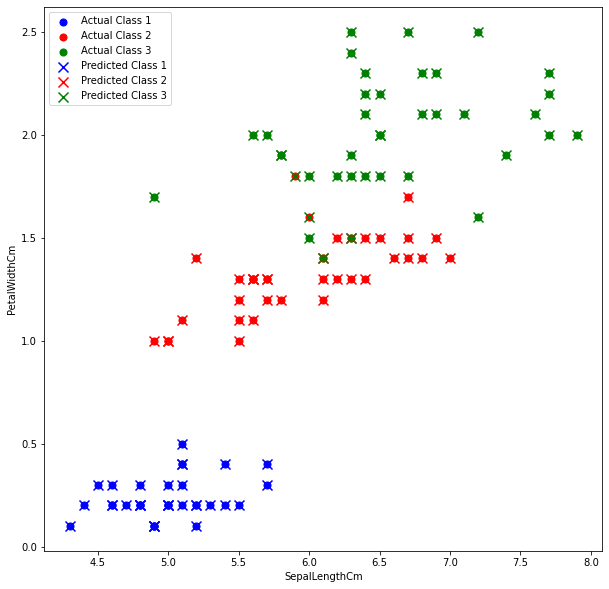

In [28]:
plt.figure(figsize = (10, 10))

plt.xlabel('SepalLengthCm')
plt.ylabel('PetalWidthCm')

plt.scatter(Xtrain_0['SepalLengthCm'], Xtrain_0['PetalWidthCm'], s=50, c='b', marker='o', label='Actual Class 1')
plt.scatter(Xtrain_1['SepalLengthCm'], Xtrain_1['PetalWidthCm'], s=50, c='r', marker='o', label='Actual Class 2')
plt.scatter(Xtrain_2['SepalLengthCm'], Xtrain_2['PetalWidthCm'], s=50, c='g', marker='o', label='Actual Class 3')

plt.scatter(Xpred_0['SepalLengthCm'], Xpred_0['PetalWidthCm'], s=100, c='b', marker='x', label='Predicted Class 1')
plt.scatter(Xpred_1['SepalLengthCm'], Xpred_1['PetalWidthCm'], s=100, c='r', marker='x', label='Predicted Class 2')
plt.scatter(Xpred_2['SepalLengthCm'], Xpred_2['PetalWidthCm'], s=100, c='g', marker='x', label='Predicted Class 3')

plt.legend()
plt.show()

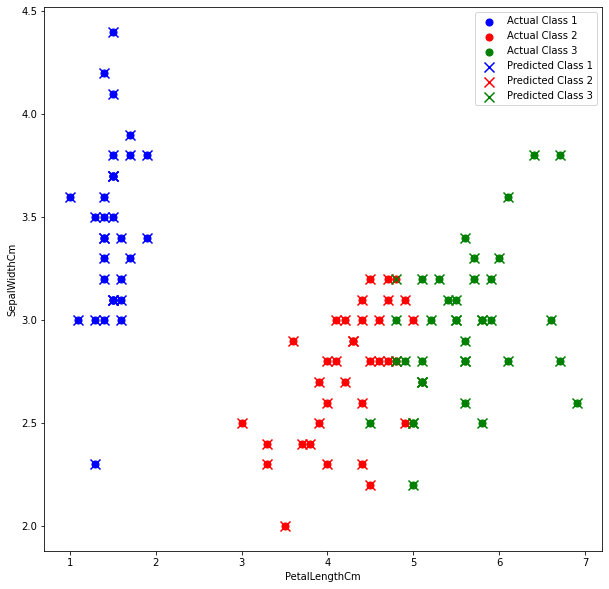

In [29]:
plt.figure(figsize = (10, 10))

plt.xlabel('PetalLengthCm')
plt.ylabel('SepalWidthCm')

plt.scatter(Xtrain_0['PetalLengthCm'], Xtrain_0['SepalWidthCm'], s=50, c='b', marker='o', label='Actual Class 1')
plt.scatter(Xtrain_1['PetalLengthCm'], Xtrain_1['SepalWidthCm'], s=50, c='r', marker='o', label='Actual Class 2')
plt.scatter(Xtrain_2['PetalLengthCm'], Xtrain_2['SepalWidthCm'], s=50, c='g', marker='o', label='Actual Class 3')

plt.scatter(Xpred_0['PetalLengthCm'], Xpred_0['SepalWidthCm'], s=100, c='b', marker='x', label='Predicted Class 1')
plt.scatter(Xpred_1['PetalLengthCm'], Xpred_1['SepalWidthCm'], s=100, c='r', marker='x', label='Predicted Class 2')
plt.scatter(Xpred_2['PetalLengthCm'], Xpred_2['SepalWidthCm'], s=100, c='g', marker='x', label='Predicted Class 3')

plt.legend()
plt.show()

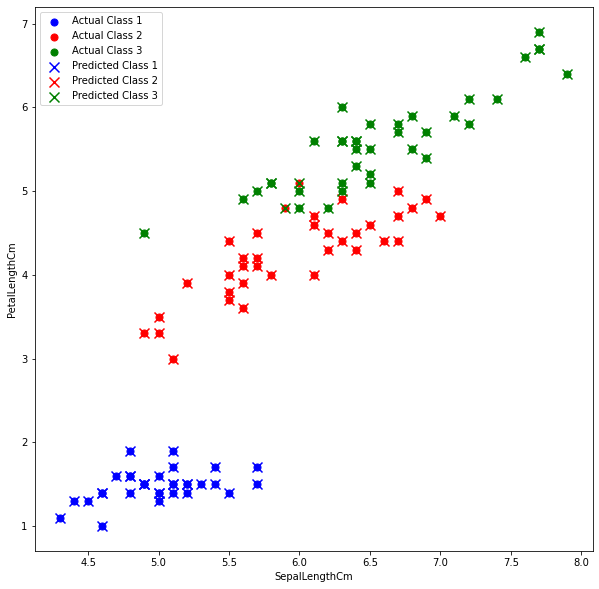

In [30]:
plt.figure(figsize = (10, 10))

plt.xlabel('SepalLengthCm')
plt.ylabel('PetalLengthCm')

plt.scatter(Xtrain_0['SepalLengthCm'], Xtrain_0['PetalLengthCm'], s=50, c='b', marker='o', label='Actual Class 1')
plt.scatter(Xtrain_1['SepalLengthCm'], Xtrain_1['PetalLengthCm'], s=50, c='r', marker='o', label='Actual Class 2')
plt.scatter(Xtrain_2['SepalLengthCm'], Xtrain_2['PetalLengthCm'], s=50, c='g', marker='o', label='Actual Class 3')

plt.scatter(Xpred_0['SepalLengthCm'], Xpred_0['PetalLengthCm'], s=100, c='b', marker='x', label='Predicted Class 1')
plt.scatter(Xpred_1['SepalLengthCm'], Xpred_1['PetalLengthCm'], s=100, c='r', marker='x', label='Predicted Class 2')
plt.scatter(Xpred_2['SepalLengthCm'], Xpred_2['PetalLengthCm'], s=100, c='g', marker='x', label='Predicted Class 3')

plt.legend()
plt.show()

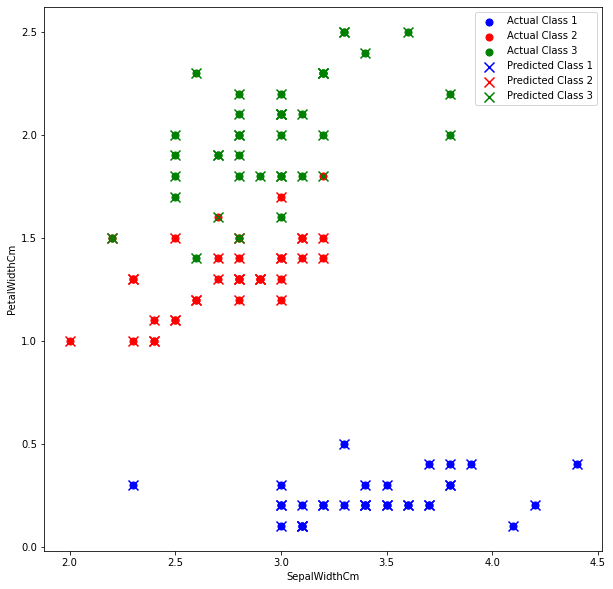

In [31]:
plt.figure(figsize = (10, 10))

plt.xlabel('SepalWidthCm')
plt.ylabel('PetalWidthCm')

plt.scatter(Xtrain_0['SepalWidthCm'], Xtrain_0['PetalWidthCm'], s=50, c='b', marker='o', label='Actual Class 1')
plt.scatter(Xtrain_1['SepalWidthCm'], Xtrain_1['PetalWidthCm'], s=50, c='r', marker='o', label='Actual Class 2')
plt.scatter(Xtrain_2['SepalWidthCm'], Xtrain_2['PetalWidthCm'], s=50, c='g', marker='o', label='Actual Class 3')

plt.scatter(Xpred_0['SepalWidthCm'], Xpred_0['PetalWidthCm'], s=100, c='b', marker='x', label='Predicted Class 1')
plt.scatter(Xpred_1['SepalWidthCm'], Xpred_1['PetalWidthCm'], s=100, c='r', marker='x', label='Predicted Class 2')
plt.scatter(Xpred_2['SepalWidthCm'], Xpred_2['PetalWidthCm'], s=100, c='g', marker='x', label='Predicted Class 3')

plt.legend()
plt.show()

From these plots, we can see that class 1 is classified correctly but there is a few misclassification between class 2 and class 3. These misclassification is due to some similarities of floral features between Iris versicolor and Iris virginica.

## On your own to take home

We see that the Iris dataset is pretty easy. Depending on the train/test split, we get 95-100% accuracy.

Find a more interesting multi-class classification problem on Kaggle (Tell the reference), clean the dataset to obtain numerical input features without missing values,
split the data into test and train, and experiment with multinomial logistic regression.

Write a brief report on your experiments and results. As always, turn in a Jupyter notebook by email
to the instructor and TA.


For the take home exercise, I used the 'seattle-weather.csv" data from Kaggle and then applied multinomial logistic regression. The link of the dataset is given here: https://www.kaggle.com/datasets/ananthr1/weather-prediction

In [1]:
%reset

Once deleted, variables cannot be recovered. Proceed (y/[n])?  y


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import random
import math

In [3]:
data = pd.read_csv('seattle-weather.csv')

In [4]:
data.head()

,date,precipitation,temp_max,temp_min,wind,weather
0,2012-01-01,0.0,12.8,5.0,4.7,drizzle
1,2012-01-02,10.9,10.6,2.8,4.5,rain
2,2012-01-03,0.8,11.7,7.2,2.3,rain
3,2012-01-04,20.3,12.2,5.6,4.7,rain
4,2012-01-05,1.3,8.9,2.8,6.1,rain


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1461 entries, 0 to 1460
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           1461 non-null   object 
 1   precipitation  1461 non-null   float64
 2   temp_max       1461 non-null   float64
 3   temp_min       1461 non-null   float64
 4   wind           1461 non-null   float64
 5   weather        1461 non-null   object 
dtypes: float64(4), object(2)
memory usage: 68.6+ KB


In [6]:
data.isnull().sum()

date             0
precipitation    0
temp_max         0
temp_min         0
wind             0
weather          0
dtype: int64

It can be observed that there is no missing value in the dataset.

In [7]:
data.shape

(1461, 6)

In [8]:
data

,date,precipitation,temp_max,temp_min,wind,weather
0,2012-01-01,0.0,12.8,5.0,4.7,drizzle
1,2012-01-02,10.9,10.6,2.8,4.5,rain
2,2012-01-03,0.8,11.7,7.2,2.3,rain
3,2012-01-04,20.3,12.2,5.6,4.7,rain
4,2012-01-05,1.3,8.9,2.8,6.1,rain
...,...,...,...,...,...,...
1456,2015-12-27,8.6,4.4,1.7,2.9,rain
1457,2015-12-28,1.5,5.0,1.7,1.3,rain
1458,2015-12-29,0.0,7.2,0.6,2.6,fog
1459,2015-12-30,0.0,5.6,-1.0,3.4,sun


From the data, we can obtain that the columns of input features are already numerical except the date column. The date column will not be used as an input feature later since it is not important to predict the weather condition.

In [9]:
def phi(i, theta, X, num_class):
    """
    Here is how to make documentation for your function show up in intellisense.
    Explanation you put here will be shown when you use it.
    
    To get intellisense in your Jupyter notebook:
        - Press 'TAB' after typing a dot (.) to see methods and attributes
        - Press 'Shift+TAB' after typing a function name to see its documentation

    The `phi` function returns phi_i = h_theta(x) for input patterns X and parameters theta.
    
    Inputs:
        i=index of phi
        
        X=input dataset
        
        theta=parameters

    Returns:
        phi_i
    """
    mat_theta = np.matrix(theta[i])
    mat_x = np.matrix(X)
    num = math.exp(np.dot(mat_theta, mat_x.T))
    den = 0
    for j in range(0,num_class):
        mat_theta_j = np.matrix(theta[j])
        den = den + math.exp(np.dot(mat_theta_j, mat_x.T))
    phi_i = num / den
    return phi_i

In [10]:
def indicator(i, j):
    '''
    Check whether i is equal to j
    
    Return:
        1 when i=j, otherwise 0
    '''
    if i == j: return 1
    else: return 0


def grad_cost(X, y, j, theta, num_class):
    '''
    Compute the gradient of the cost function for data X, y for parameters of
    output for class j in 1..k
    '''
    m, n = X.shape
    sum = np.array([0 for i in range(0,n)])
    for i in range(0, m):
        p = indicator(y[i], j) - phi(j, theta, X.loc[i], num_class)
        sum = sum + (X.loc[i] * p)
    grad = -sum / m
    return grad

def gradient_descent(X, y, theta, alpha, iters, num_class):
    '''
    Perform iters iterations of gradient descent: theta_new = theta_old - alpha * cost
    '''
    n = X.shape[1]
    for iter in range(iters):
        dtheta = np.zeros((num_class, n))
        for j in range(0, num_class):
            dtheta[j,:] = grad_cost(X, y, j, theta, num_class)
        theta = theta - alpha * dtheta
    return theta

def h(X, theta, num_class):
    '''
    Hypothesis function: h_theta(X) = theta * X
    '''
    X = np.matrix(X)
    h_matrix = np.empty((num_class,1))
    den = 0
    for j in range(0, num_class):
        den = den + math.exp(np.dot(theta[j], X.T))
    for i in range(0,num_class):
        h_matrix[i] = math.exp(np.dot(theta[i], X.T))
    h_matrix = h_matrix / den
    return h_matrix

In [11]:
def normalized_data(data):
    means = np.mean(data, axis=0) 
    stds = np.std(data, axis=0) 
    data_norm = (data - means) / stds
    return data_norm

In [12]:
X = data[ ['precipitation', 'temp_max', 'temp_min', 'wind'] ]
y = data['weather']

In [13]:
X.shape, y.shape

((1461, 4), (1461,))

In [14]:
X_norm = normalized_data(X)

In [15]:
def partition(X, y, percent_train):
    
    y_labels_name = None
    y_labels_new = None
    
    idx = np.arange(0,y.shape[0])
    
    random.shuffle(idx)
    
    m = X.shape[0]
    idx_train = idx[0: int(percent_train*len(X))]
    idx_test = idx[int(percent_train*len(X)):]
    
    X_train = X.iloc[idx_train]
    y_train = y.iloc[idx_train]
    X_test = X.iloc[idx_test]
    y_test = y.iloc[idx_test]
    
    y_labels_name = pd.unique(y) 
    
    y_labels_new = []
    
    i = 0
    for label in y_labels_name:
        print(label)
        y_labels_new.append(i)
        i = i + 1
    
    X_train_reset = X_train.reset_index()
    X_train = X_train_reset.drop(['index'], axis = 1)
    
    X_test_reset = X_test.reset_index()
    X_test = X_test_reset.drop(['index'], axis = 1)
    
    y_train_reset = y_train.reset_index()
    y_train = y_train_reset.drop(['index'], axis = 1)
    y_train = pd.Series(y_train.values.reshape(-1,))
        
    y_test_reset = y_test.reset_index()
    y_test = y_test_reset.drop(['index'], axis = 1)
    y_test = pd.Series(y_test.values.reshape(-1,))
    
    for i in y_labels_new:
        y_train = y_train.replace(y_labels_name[i],i)
        y_test = y_test.replace(y_labels_name[i],i)
    
    return idx, X_train, y_train, X_test, y_test, y_labels_name, y_labels_new

In [16]:
percent_train = 0.7
idx, X_train, y_train, X_test, y_test, y_labels_name, y_labels_new = partition(X_norm, y, percent_train)

drizzle
rain
sun
snow
fog


In [17]:
print('X_train.shape', X_train.shape)
print('X_test.shape', X_test.shape)
print('y_train.shape', y_train.shape)
print('y_test.shape', y_test.shape)
print('y_labels_name: ', y_labels_name)
print('y_labels_new: ', y_labels_new)
print(X_train.head())
print(y_train.head())

X_train.shape (1022, 4)
X_test.shape (439, 4)
y_train.shape (1022,)
y_test.shape (439,)
y_labels_name:  ['drizzle' 'rain' 'sun' 'snow' 'fog']
y_labels_new:  [0, 1, 2, 3, 4]
   precipitation  temp_max  temp_min      wind
0      -0.453650  1.546283  1.128243  2.267299
1      -0.453650  0.634376 -0.206077  0.597540
2      -0.453650 -0.114204 -0.644212 -1.628806
3       0.160315 -1.325543 -1.082347 -1.002646
4       1.897386 -0.876395 -0.425144  0.527967
0    4
1    2
2    2
3    1
4    1
dtype: int64


In [18]:
# num_class is the number of unique labels
num_class = len(y_labels_name)

if (X_train.shape[1] == X.shape[1]): 
    X_train.insert(0, "intercept", 1)

r, c = X_train.shape
theta_initial = np.ones((num_class, c))

alpha = .09
iterations = 200

theta = gradient_descent(X_train, y_train, theta_initial, alpha, iterations, num_class)

In [19]:
print(theta)
print(theta.shape)

[[ 0.20525579  0.95941991  1.03549231  0.93979909  0.84487293]
 [ 2.35305462  2.00190155  0.29274995  1.51695291  1.23573157]
 [ 1.98318485 -0.11907202  1.75551391  0.71964466  0.99643712]
 [-0.02726236  1.34405071  0.8572174   0.83267282  1.18628949]
 [ 0.4857671   0.81369985  1.05902643  0.99093051  0.73666889]]
(5, 5)


In [20]:
# Prediction on test data 

if (X_test.shape[1] == X.shape[1]): 
    X_test.insert(0, "intercept", 1)

r,c = X_test.shape

y_pred = []
for index,row in X_test.iterrows(): # get a row of X_test data
     
    y_hat = h(row, theta, num_class)
    prediction = int(np.argmax(y_hat))
    
    y_pred.append(prediction)

In [21]:
print(len(y_pred))
print(y_pred[:7])
print(type(y_pred[0]))

439
[2, 2, 1, 2, 2, 2, 2]
<class 'int'>


In [22]:
def calc_accuracy(y_test, y_pred):
    
    correct_pred = np.count_nonzero([y_test == y_pred])
    accuracy = correct_pred/y_test.shape[0]
    return accuracy

In [23]:
accuracy = calc_accuracy(y_test, y_pred)
print('Accuracy: %.4f' % accuracy)

Accuracy: 0.7426


In [24]:
def my_J(theta, X, y, j, num_class):
    
    cost = -(indicator(y, j)) * np.log(phi(j, theta, X, num_class))
    return cost

In [25]:
m, n = X_train.shape
test_theta = np.ones((5, n))  
cost = my_J(test_theta, X_train.loc[10], y_train[10], 0, 5)

In [26]:
def my_grad_cost(X, y, j, theta, num_class):
    
    m, n = X.shape
    sum_ = np.zeros(n)
    total_cost = 0
    
    for i in range(0, m):
        p = indicator(y[i], j) - phi(j, theta, X.loc[i], num_class)
        cost_ = my_J(theta, X.iloc[i], y.iloc[i], j, num_class)
        sum_ = sum_ + (X.loc[i] * p)
        total_cost = total_cost + cost_
    
    grad = -sum_ / m
    cost = total_cost
    
    return grad, cost

In [27]:
m, n = X_train.shape
test_theta = np.ones((5, n))  
grad, cost = my_grad_cost(X_train, y_train, 0, test_theta, num_class)
print(grad)
print(cost)

intercept        0.162818
precipitation    0.013938
temp_max         0.001355
temp_min         0.007603
wind             0.024858
dtype: float64
61.15864067249586


In [28]:
def my_gradient_descent(X, y, theta, alpha, iters, num_class):        
    cost_arr = []
   
    m, n = X.shape
    
    for i in range(iters):
        total_cost = 0
        dtheta = np.zeros((num_class, n))
        for j in range(0, num_class):
            dtheta[j,:] , cost = my_grad_cost(X, y, j, theta, num_class)
            total_cost = total_cost + cost
        cost_arr.append(total_cost)
        theta = theta - alpha * dtheta
    
    return theta, cost_arr

In [29]:
m, n = X_train.shape
test_theta = np.ones((5, n))  
theta, cost = my_gradient_descent(X_train, y_train, theta_initial, 0.001, 5, 5)
print(theta)
print(cost)

[[0.99918624 0.99993035 0.99999322 0.99996199 0.99987578]
 [1.00121574 1.00111022 0.99904825 0.99966365 1.00071875]
 [1.00118643 0.99902313 1.00104376 1.00049142 0.99956455]
 [0.99907865 1.0000725  0.99990717 0.99990404 1.0000316 ]
 [0.99933295 0.9998638  1.0000076  0.99997889 0.99980933]]
[1644.8455465076577, 1644.4287464139677, 1644.0121740334068, 1643.595829352202, 1643.1797123564008]


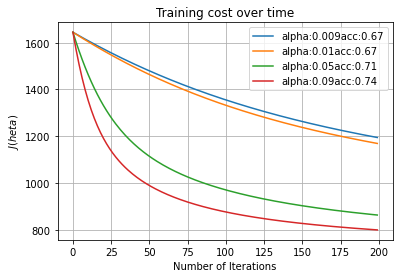

In [30]:
theta_arr = []
cost_arr = []
accuracy_arr = []

# designing different learning rates and num iterations
alpha_arr = np.array([0.009, 0.01, 0.05, 0.09])
iterations_arr = np.array([200, 200, 200, 200])

def prediction(X, theta):
    
    y_pred = []
    
    for index,row in X.iterrows(): # get a row of X_test data
        
        y_hat = h(row, theta, num_class)
        result = int(np.where(y_hat == np.amax(y_hat))[0])
        prediction = result

        y_pred.append(prediction)
    return y_pred

for i in range(len(iterations_arr)):
    
    theta, cost = my_gradient_descent(X_train, y_train, theta_initial, alpha_arr[i], iterations_arr[i], num_class)
    theta_arr.append(theta)
    cost_arr.append(cost)
    y_pred = prediction(X_test, theta)
    accuracy = calc_accuracy(y_test, y_pred)
    accuracy_arr.append(accuracy)
    
plt.grid()
plt.plot(cost_arr[0], label='alpha:' + str(alpha_arr[0]) + 'acc:'+ str(round(accuracy_arr[0],2)))
plt.plot(cost_arr[1], label='alpha:' + str(alpha_arr[1]) + 'acc:'+ str(round(accuracy_arr[1],2)))
plt.plot(cost_arr[2], label='alpha:' + str(alpha_arr[2]) + 'acc:'+ str(round(accuracy_arr[2],2)))
plt.plot(cost_arr[3], label='alpha:' + str(alpha_arr[3]) + 'acc:'+ str(round(accuracy_arr[3],2)))
plt.xlabel("Number of Iterations")
plt.ylabel("$J(\theta)$")
plt.title("Training cost over time")
plt.legend()
plt.show()

In [31]:
y_pred = prediction(X_train, theta)
accuracy = calc_accuracy(y_train, y_pred)
print("Training accuracy:", accuracy)

Training accuracy: 0.7495107632093934


In [33]:
# list of indexes for each actual class
trainX_0 = [i for i in range(len(y_train)) if y_train[i] == 0]
trainX_1 = [i for i in range(len(y_train)) if y_train[i] == 1]
trainX_2 = [i for i in range(len(y_train)) if y_train[i] == 2]
trainX_3 = [i for i in range(len(y_train)) if y_train[i] == 3]
trainX_4 = [i for i in range(len(y_train)) if y_train[i] == 4]

# list of indexes for each predicted class
predX_0 = [i for i in range(len(y_pred)) if y_pred[i] == 0]
predX_1 = [i for i in range(len(y_pred)) if y_pred[i] == 1]
predX_2 = [i for i in range(len(y_pred)) if y_pred[i] == 2]
predX_3 = [i for i in range(len(y_pred)) if y_pred[i] == 3]
predX_4 = [i for i in range(len(y_pred)) if y_pred[i] == 4]

In [34]:
# retrieving rows from X_train for actaul class index   
Xtrain_0 = X_train.iloc[trainX_0, :]
Xtrain_1 = X_train.iloc[trainX_1, :]
Xtrain_2 = X_train.iloc[trainX_2, :]
Xtrain_3 = X_train.iloc[trainX_3, :]
Xtrain_4 = X_train.iloc[trainX_4, :]

# retrieving rows from X_train for predicted class index 
Xpred_0 = X_train.iloc[predX_0, :]
Xpred_1 = X_train.iloc[predX_1, :]
Xpred_2 = X_train.iloc[predX_2, :]
Xpred_3 = X_train.iloc[predX_3, :]
Xpred_4 = X_train.iloc[predX_4, :]

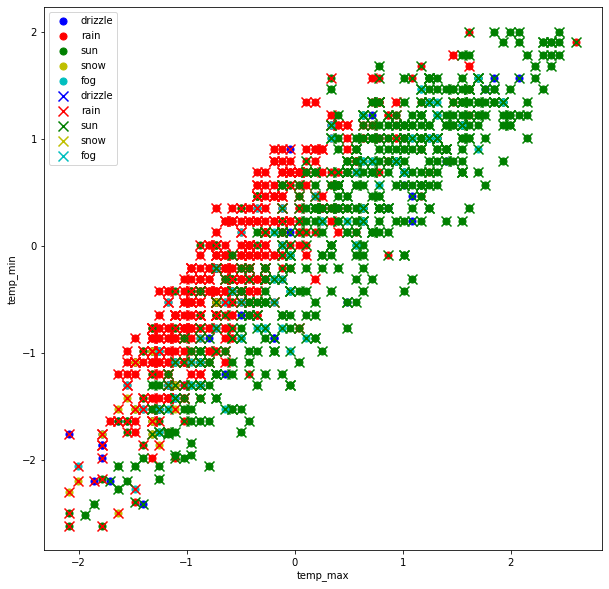

In [37]:
plt.figure(figsize = (10, 10))

plt.xlabel('temp_max')
plt.ylabel('temp_min')

plt.scatter(Xtrain_0['temp_max'], Xtrain_0['temp_min'], s=50, c='b', marker='o', label='drizzle')
plt.scatter(Xtrain_1['temp_max'], Xtrain_1['temp_min'], s=50, c='r', marker='o', label='rain')
plt.scatter(Xtrain_2['temp_max'], Xtrain_2['temp_min'], s=50, c='g', marker='o', label='sun')
plt.scatter(Xtrain_3['temp_max'], Xtrain_3['temp_min'], s=50, c='y', marker='o', label='snow')
plt.scatter(Xtrain_4['temp_max'], Xtrain_4['temp_min'], s=50, c='c', marker='o', label='fog')

plt.scatter(Xpred_0['temp_max'], Xpred_0['temp_min'], s=100, c='b', marker='x', label='drizzle')
plt.scatter(Xpred_1['temp_max'], Xpred_1['temp_min'], s=100, c='r', marker='x', label='rain')
plt.scatter(Xpred_2['temp_max'], Xpred_2['temp_min'], s=100, c='g', marker='x', label='sun')
plt.scatter(Xpred_3['temp_max'], Xpred_3['temp_min'], s=100, c='y', marker='x', label='snow')
plt.scatter(Xpred_4['temp_max'], Xpred_4['temp_min'], s=100, c='c', marker='x', label='fog')

plt.legend()
plt.show()

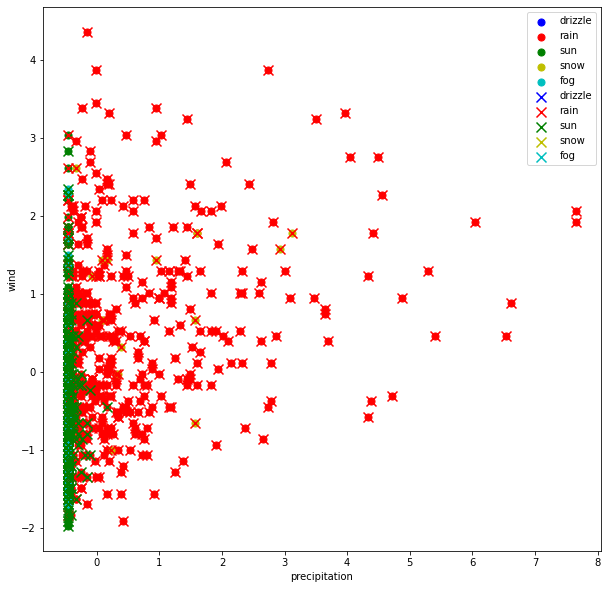

In [40]:
plt.figure(figsize = (10, 10))

plt.xlabel('precipitation')
plt.ylabel('wind')

plt.scatter(Xtrain_0['precipitation'], Xtrain_0['wind'], s=50, c='b', marker='o', label='drizzle')
plt.scatter(Xtrain_1['precipitation'], Xtrain_1['wind'], s=50, c='r', marker='o', label='rain')
plt.scatter(Xtrain_2['precipitation'], Xtrain_2['wind'], s=50, c='g', marker='o', label='sun')
plt.scatter(Xtrain_3['precipitation'], Xtrain_3['wind'], s=50, c='y', marker='o', label='snow')
plt.scatter(Xtrain_4['precipitation'], Xtrain_4['wind'], s=50, c='c', marker='o', label='fog')

plt.scatter(Xpred_0['precipitation'], Xpred_0['wind'], s=100, c='b', marker='x', label='drizzle')
plt.scatter(Xpred_1['precipitation'], Xpred_1['wind'], s=100, c='r', marker='x', label='rain')
plt.scatter(Xpred_2['precipitation'], Xpred_2['wind'], s=100, c='g', marker='x', label='sun')
plt.scatter(Xpred_3['precipitation'], Xpred_3['wind'], s=100, c='y', marker='x', label='snow')
plt.scatter(Xpred_4['precipitation'], Xpred_4['wind'], s=100, c='c', marker='x', label='fog')

plt.legend()
plt.show()

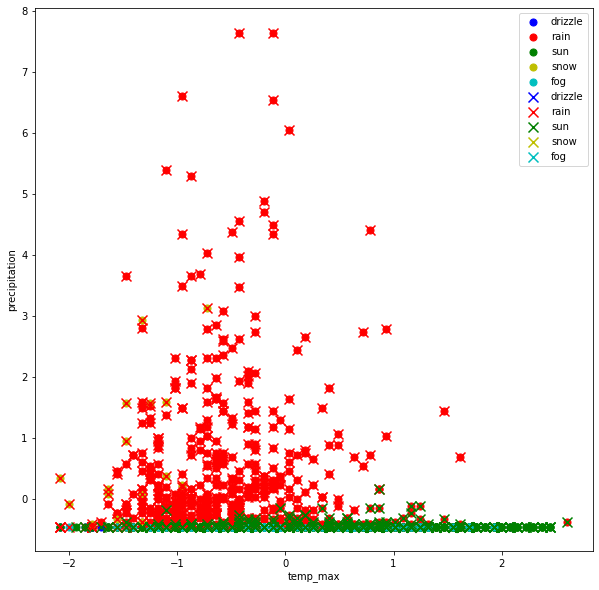

In [41]:
plt.figure(figsize = (10, 10))

plt.xlabel('temp_max')
plt.ylabel('precipitation')

plt.scatter(Xtrain_0['temp_max'], Xtrain_0['precipitation'], s=50, c='b', marker='o', label='drizzle')
plt.scatter(Xtrain_1['temp_max'], Xtrain_1['precipitation'], s=50, c='r', marker='o', label='rain')
plt.scatter(Xtrain_2['temp_max'], Xtrain_2['precipitation'], s=50, c='g', marker='o', label='sun')
plt.scatter(Xtrain_3['temp_max'], Xtrain_3['precipitation'], s=50, c='y', marker='o', label='snow')
plt.scatter(Xtrain_4['temp_max'], Xtrain_4['precipitation'], s=50, c='c', marker='o', label='fog')

plt.scatter(Xpred_0['temp_max'], Xpred_0['precipitation'], s=100, c='b', marker='x', label='drizzle')
plt.scatter(Xpred_1['temp_max'], Xpred_1['precipitation'], s=100, c='r', marker='x', label='rain')
plt.scatter(Xpred_2['temp_max'], Xpred_2['precipitation'], s=100, c='g', marker='x', label='sun')
plt.scatter(Xpred_3['temp_max'], Xpred_3['precipitation'], s=100, c='y', marker='x', label='snow')
plt.scatter(Xpred_4['temp_max'], Xpred_4['precipitation'], s=100, c='c', marker='x', label='fog')

plt.legend()
plt.show()

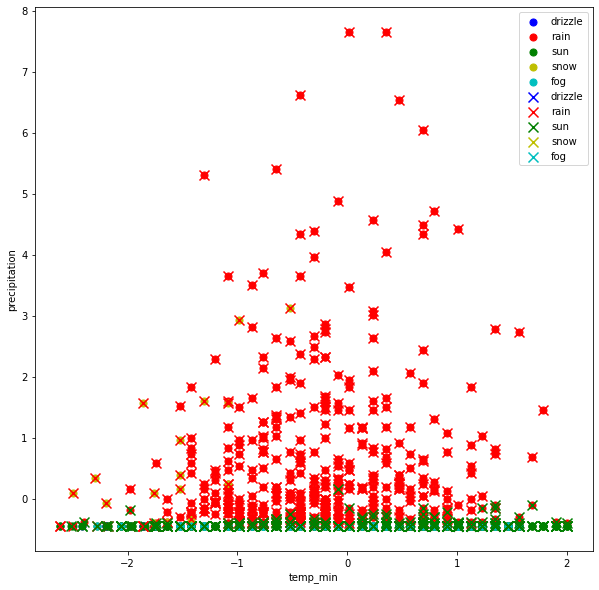

In [42]:
plt.figure(figsize = (10, 10))

plt.xlabel('temp_min')
plt.ylabel('precipitation')

plt.scatter(Xtrain_0['temp_min'], Xtrain_0['precipitation'], s=50, c='b', marker='o', label='drizzle')
plt.scatter(Xtrain_1['temp_min'], Xtrain_1['precipitation'], s=50, c='r', marker='o', label='rain')
plt.scatter(Xtrain_2['temp_min'], Xtrain_2['precipitation'], s=50, c='g', marker='o', label='sun')
plt.scatter(Xtrain_3['temp_min'], Xtrain_3['precipitation'], s=50, c='y', marker='o', label='snow')
plt.scatter(Xtrain_4['temp_min'], Xtrain_4['precipitation'], s=50, c='c', marker='o', label='fog')

plt.scatter(Xpred_0['temp_min'], Xpred_0['precipitation'], s=100, c='b', marker='x', label='drizzle')
plt.scatter(Xpred_1['temp_min'], Xpred_1['precipitation'], s=100, c='r', marker='x', label='rain')
plt.scatter(Xpred_2['temp_min'], Xpred_2['precipitation'], s=100, c='g', marker='x', label='sun')
plt.scatter(Xpred_3['temp_min'], Xpred_3['precipitation'], s=100, c='y', marker='x', label='snow')
plt.scatter(Xpred_4['temp_min'], Xpred_4['precipitation'], s=100, c='c', marker='x', label='fog')

plt.legend()
plt.show()

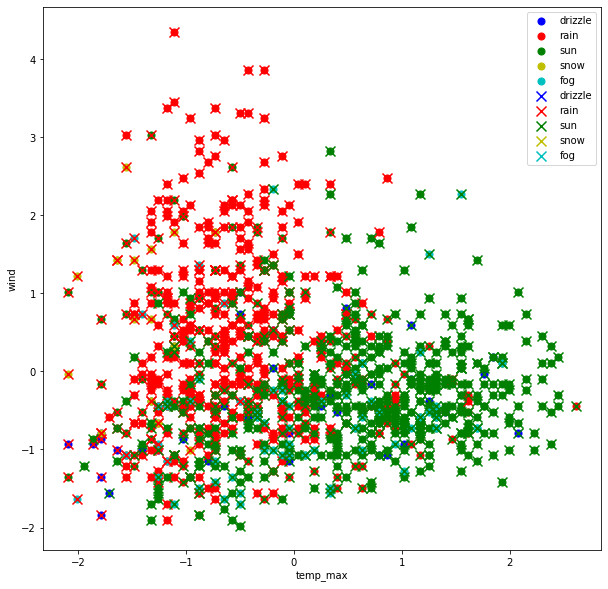

In [44]:
plt.figure(figsize = (10, 10))

plt.xlabel('temp_max')
plt.ylabel('wind')

plt.scatter(Xtrain_0['temp_max'], Xtrain_0['wind'], s=50, c='b', marker='o', label='drizzle')
plt.scatter(Xtrain_1['temp_max'], Xtrain_1['wind'], s=50, c='r', marker='o', label='rain')
plt.scatter(Xtrain_2['temp_max'], Xtrain_2['wind'], s=50, c='g', marker='o', label='sun')
plt.scatter(Xtrain_3['temp_max'], Xtrain_3['wind'], s=50, c='y', marker='o', label='snow')
plt.scatter(Xtrain_4['temp_max'], Xtrain_4['wind'], s=50, c='c', marker='o', label='fog')

plt.scatter(Xpred_0['temp_max'], Xpred_0['wind'], s=100, c='b', marker='x', label='drizzle')
plt.scatter(Xpred_1['temp_max'], Xpred_1['wind'], s=100, c='r', marker='x', label='rain')
plt.scatter(Xpred_2['temp_max'], Xpred_2['wind'], s=100, c='g', marker='x', label='sun')
plt.scatter(Xpred_3['temp_max'], Xpred_3['wind'], s=100, c='y', marker='x', label='snow')
plt.scatter(Xpred_4['temp_max'], Xpred_4['wind'], s=100, c='c', marker='x', label='fog')

plt.legend()
plt.show()

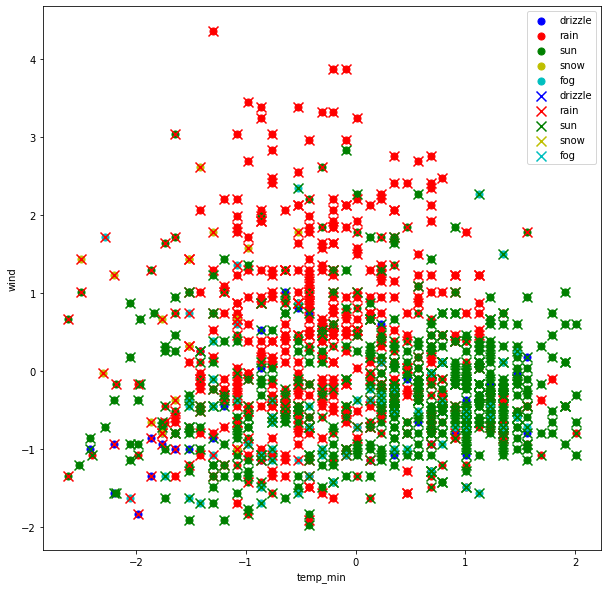

In [45]:
plt.figure(figsize = (10, 10))

plt.xlabel('temp_min')
plt.ylabel('wind')

plt.scatter(Xtrain_0['temp_min'], Xtrain_0['wind'], s=50, c='b', marker='o', label='drizzle')
plt.scatter(Xtrain_1['temp_min'], Xtrain_1['wind'], s=50, c='r', marker='o', label='rain')
plt.scatter(Xtrain_2['temp_min'], Xtrain_2['wind'], s=50, c='g', marker='o', label='sun')
plt.scatter(Xtrain_3['temp_min'], Xtrain_3['wind'], s=50, c='y', marker='o', label='snow')
plt.scatter(Xtrain_4['temp_min'], Xtrain_4['wind'], s=50, c='c', marker='o', label='fog')

plt.scatter(Xpred_0['temp_min'], Xpred_0['wind'], s=100, c='b', marker='x', label='drizzle')
plt.scatter(Xpred_1['temp_min'], Xpred_1['wind'], s=100, c='r', marker='x', label='rain')
plt.scatter(Xpred_2['temp_min'], Xpred_2['wind'], s=100, c='g', marker='x', label='sun')
plt.scatter(Xpred_3['temp_min'], Xpred_3['wind'], s=100, c='y', marker='x', label='snow')
plt.scatter(Xpred_4['temp_min'], Xpred_4['wind'], s=100, c='c', marker='x', label='fog')

plt.legend()
plt.show()

From the "seattle-weather.csv" dataset, we can see some misclassifications among the five classes. Also, most of the misclassifications are between rain or sun class with the other classes. Since there are five classes, I think, more samples and more features can obtain better performance than the current one.

In lab exercise, we used the "Iris.csv" dataset and then used multinomial logistic regression to class the three types of iris species. Then we obtained the best accuracy with 0.09 learning rate for 200 iterations. Still, there were a few misclassification between Iris versicolor and Iris virginica species in terms of their sepal and petal features. Then we used the "seattle-weather.csv" dataset from Kaggle to apply multinomial logistic regression to classify the 5 types of weather conditions. The best accuracy for this dataset was achieved was 74% with learning rate 0.09 for 200 iterations. Then we plotted the missclassified samples with two input features at a time, where most of the misclassification occured between rain/sun class with the other classes.